In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.10f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
population = pd.read_csv('Population by Age and Sex - US, States, Counties.csv')


In [20]:
##Gabby test cell
filtered_pop = population[population['Description'] == 'U.S.']

# Remove unnecessary columns
filtered_pop = filtered_pop.drop(['IBRC_Geo_ID', 'Statefips', 'Countyfips'], axis=1)

# Function to get percentages of populations
def percent(row, name):
    base = row['Total Population']
    return row[name]/base

for c in filtered_pop.columns:
    if 'population' in c.lower():
        filtered_pop['% ' + c] = filtered_pop.apply(lambda row: percent(row, c), axis = 1)
#filtered_pop['0-4 Percent'] = filtered_pop.apply(lambda row: percent(row, "Population 0-4"), axis = 1)
def get_avg_age(row):
    base = row['Total Population']
    populations = [row['Population 0-4'], row['Population 5-17'], row['Population 18-24'], row['Population 25-44'], row['Population 45-64'], row['Population 65+']]  # Populations by group
    midpoints = [2.5, 11, 21, 34.5, 54.5, 75]  # Midpoints of age groups
    weighted_ages = sum(pop * mid for pop, mid in zip(populations, midpoints))
    return weighted_ages / base
# Weighted sum of ages

filtered_pop['Average Age'] = filtered_pop.apply(lambda row: get_avg_age(row), axis = 1)
filtered_pop.head()

,Description,Year,Total Population,Population 0-4,Population 5-17,Population 18-24,Population 25-44,Population 45-64,Population 65+,Population Under 18,...,% Population 18-24,% Population 25-44,% Population 45-64,% Population 65+,% Population Under 18,% Population 18-54,% Population 55+,% Male Population,% Female Population,Average Age
0,U.S.,2000,"282,162,411.0000000000","19,178,293.0000000000","53,197,896.0000000000","27,315,274.0000000000","84,973,340.0000000000","62,428,040.0000000000","35,069,568.0000000000","72,376,189.0000000000",...,0.0968069202,0.3011504605,0.2212486056,0.1242885892,0.2565054245,0.5326279552,0.2108666204,0.4906514887,0.5093485113,36.0461526979
1,U.S.,2001,"284,968,955.0000000000","19,298,217.0000000000","53,372,958.0000000000","27,992,652.0000000000","84,523,274.0000000000","64,491,563.0000000000","35,290,291.0000000000","72,671,175.0000000000",...,0.0982305318,0.2966052004,0.2263108380,0.1238390722,0.2550143576,0.5330482192,0.2119374231,0.4909008141,0.5090991859,36.1471260404
2,U.S.,2002,"287,625,193.0000000000","19,429,192.0000000000","53,507,265.0000000000","28,480,708.0000000000","83,990,295.0000000000","66,695,526.0000000000","35,522,207.0000000000","72,936,457.0000000000",...,0.0990202134,0.2920129983,0.2318834637,0.1235017233,0.2535816012,0.5300759485,0.2163424502,0.4910229091,0.5089770909,36.2693702999
3,U.S.,2003,"290,107,933.0000000000","19,592,446.0000000000","53,508,312.0000000000","28,916,746.0000000000","83,398,001.0000000000","68,828,899.0000000000","35,863,529.0000000000","73,100,758.0000000000",...,0.0996758196,0.2874723216,0.2372527297,0.1236213317,0.2519777975,0.5278542349,0.2201679676,0.4909514039,0.5090485961,36.4105690209
4,U.S.,2004,"292,805,298.0000000000","19,785,885.0000000000","53,511,850.0000000000","29,302,179.0000000000","83,066,831.0000000000","70,935,234.0000000000","36,203,319.0000000000","73,297,735.0000000000",...,0.1000739372,0.2836930601,0.2422607599,0.1236429779,0.2503292649,0.5259431474,0.2237275877,0.4912069999,0.5087930001,36.5446449982


(1998.0, 2021.0)

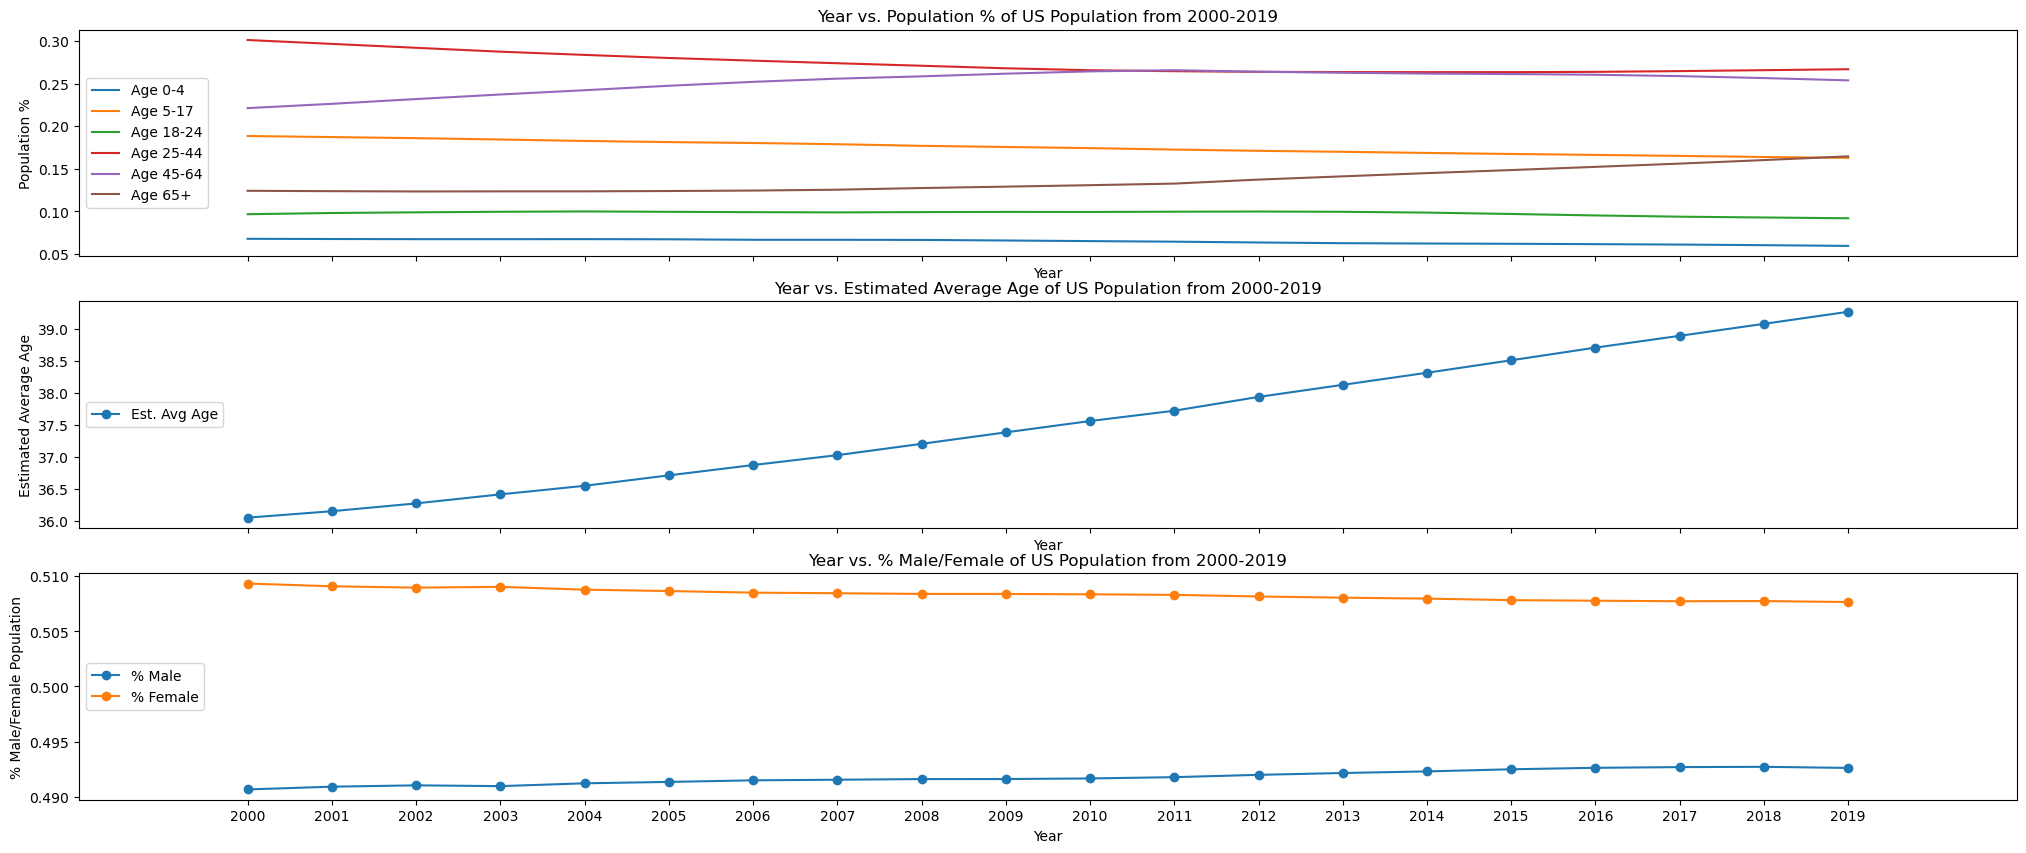

In [24]:
fig_width = len(filtered_pop)*1.25
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(fig_width,10))

ax1.plot(filtered_pop['Year'], filtered_pop['% Population 0-4'], label= 'Age 0-4')
ax1.plot(filtered_pop['Year'], filtered_pop['% Population 5-17'], label= 'Age 5-17')
ax1.plot(filtered_pop['Year'], filtered_pop['% Population 18-24'], label= 'Age 18-24')
ax1.plot(filtered_pop['Year'], filtered_pop['% Population 25-44'], label= 'Age 25-44')
ax1.plot(filtered_pop['Year'], filtered_pop['% Population 45-64'], label= 'Age 45-64')
ax1.plot(filtered_pop['Year'], filtered_pop['% Population 65+'], label= 'Age 65+')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population %')
ax1.set_title('Year vs. Population % of US Population from 2000-2019')
ax1.legend(loc='center left')

ax2.plot(filtered_pop['Year'], filtered_pop['Average Age'], label= 'Est. Avg Age', marker='o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Estimated Average Age')
ax2.set_title('Year vs. Estimated Average Age of US Population from 2000-2019')
ax2.legend(loc='center left')

ax3.plot(filtered_pop['Year'], filtered_pop['% Male Population'], label= '% Male', marker='o')
ax3.plot(filtered_pop['Year'], filtered_pop['% Female Population'], label= '% Female', marker='o')
ax3.set_xlabel('Year')
ax3.set_ylabel('% Male/Female Population')
ax3.set_title('Year vs. % Male/Female of US Population from 2000-2019')
ax3.legend(loc='center left')


plt.xticks(filtered_pop['Year'])
plt.xlim(1998, 2021)

